<a href="https://colab.research.google.com/github/G100A008/Python/blob/master/G100A008_Construct%20a%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

def simple_linear_regression(raw_x,raw_y):
  n = np.size(raw_x)
  x = np.array(raw_x)
  y = np.array(raw_y)
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  num1 = np.sum(y*x) - n*y_mean*x_mean
  num2 = np.sum(x*x) - n*x_mean*x_mean
  b_1 = num1 / num2
  b_0 = y_mean - b_1 * x_mean
  return(b_0,b_1)

rawData = load_boston()
bostonDataset = pandas.DataFrame(rawData.data,columns=rawData.feature_names)
bostonDataset['MEDV'] = rawData.target

x = np.array(bostonDataset['LSTAT'])[:,np.newaxis]
y = np.array(bostonDataset['MEDV'])[:,np.newaxis]

b0,b1 = simple_linear_regression(x,y)
bfl_x = x
bfl_y = b0 + b1 *bfl_x

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

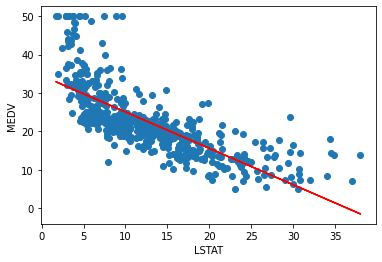

The intercept of the best fitting line is 34.553840879383145
The slope of the best fitting line is -0.950049353757994


In [157]:
plt.scatter(x,y)
plt.plot(bfl_x,bfl_y, color = "r")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.show()
print('The intercept of the best fitting line is',b0)
print('The slope of the best fitting line is',b1)

In [158]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):return np.square(x)

def dfunc(x):return 2 * x

def GD(x_start,df,epochs,lr):
  """梯度下降法"""
  xs = np.zeros(epochs+1)
  x = x_start
  xs[0] = x
  for i in range(epochs):
    dx = df(x)
    v = - dx * lr
    x += v
    xs[i+1] = x
  return xs

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


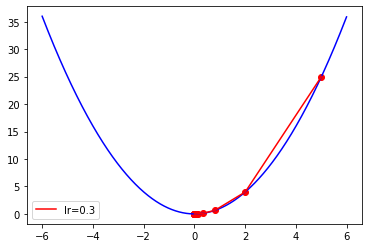

In [159]:
x_start = 5
epochs = 15

lr = 0.3

x = GD(x_start,dfunc,epochs,lr=lr)
print(x)

color = 'r'

  
from numpy import arange
t = arange(-6.0,6.0,0.01)
plt.plot(t,func(t),c='b') 
plt.plot(x,func(x),c=color,label='lr={}'.format(lr))
plt.scatter(x,func(x),c=color,)
plt.legend()
plt.show()



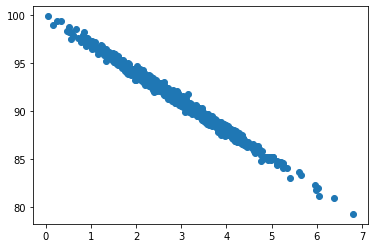

In [163]:
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0,1.0,1000)
purchaseAmount = 100 -(pageSpeeds + np.random.normal(0,0.1,1000))*3
scatter(pageSpeeds,purchaseAmount)